In [1]:
import pandas as pd
import nltk
import neattext as nt
import matplotlib.pyplot as plt
import hazm
import re
import pickle
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings
import calendar
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from  xgboost import XGBClassifier

from sklearn.metrics import (classification_report,accuracy_score,confusion_matrix,
                             precision_score, recall_score, f1_score)




In [2]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

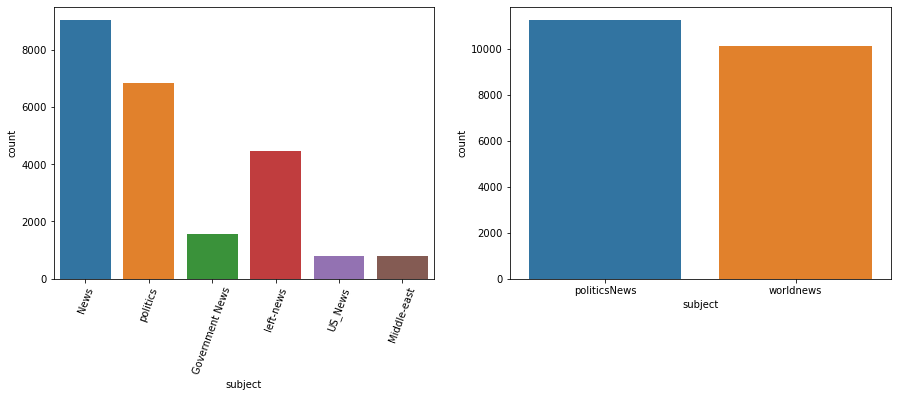

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# Fake_df & True_df
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot('subject', data=fake)
plt.xticks(rotation =70)

plt.subplot(1, 2, 2)
sns.countplot('subject', data=true)
plt.show()

In [4]:
target = ['True']*len(true)
true['target'] = target
target2 = ['Fake']*len(fake)

fake['target'] = target2


In [5]:
fake

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [6]:
data = pd.DataFrame()
data = true.append(fake, ignore_index = True)
data

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [7]:
data.isna().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [8]:
data.describe()

,title,text,subject,date,target
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


<AxesSubplot:>

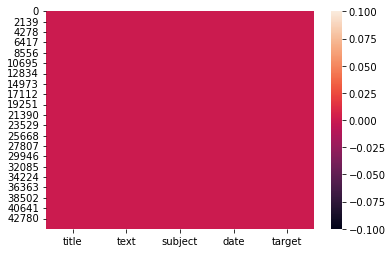

In [10]:
sns.heatmap(data.isna())

In [11]:
def preProcess(txt):
    txt = txt.lower()
    txt = nt.remove_punctuations(txt)
    txt = nt.remove_special_characters(txt)
    txt = nt.remove_urls(txt)
    txt = nt.remove_dates(txt)
    txt = nt.remove_numbers(txt)
    txt = nt.remove_stopwords(txt)
    return txt

In [12]:
data['preProcessTitle'] = data['title'].apply(preProcess)
data['preProcessText'] = data['text'].apply(preProcess)


In [13]:
data['title_length'] = data.title.apply(len)
data['text_length'] = data.text.apply(len)

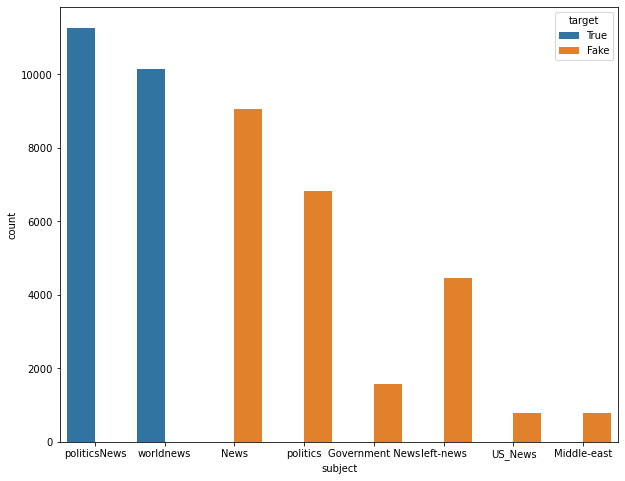

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['subject'], hue=data['target']);

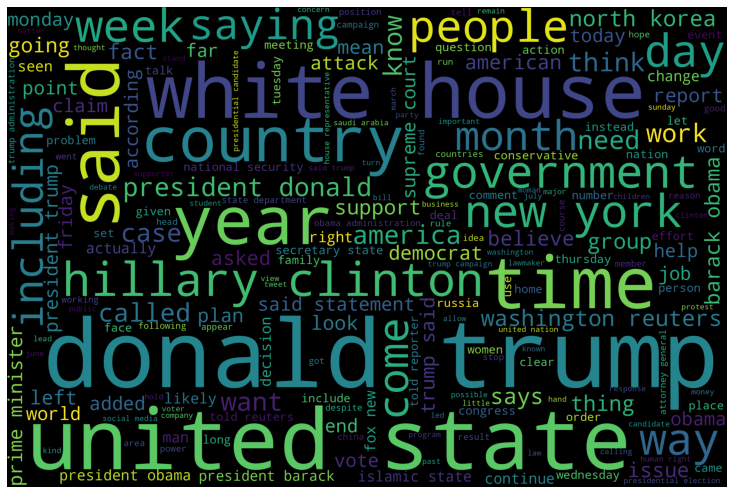

In [15]:
textTxt = ' '.join(data['preProcessText'].values)

wordcloudTxt = WordCloud(width = 3000, height = 2000,
                background_color ='black',
                min_font_size = 10).generate(textTxt)
  
                       
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloudTxt)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()



Text(0.5, 1.0, 'Fake Class')

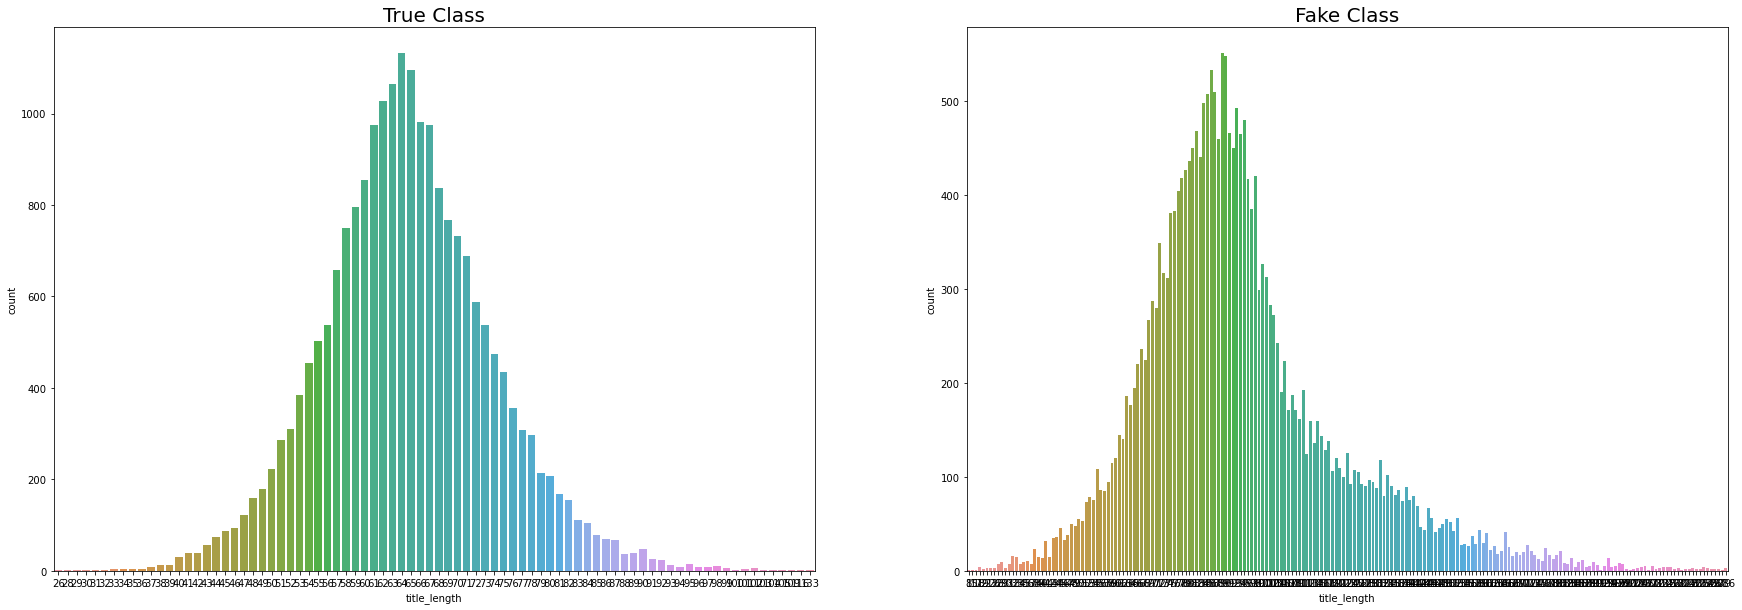

In [16]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(30,10))
plot = sns.countplot(x =data[data.target=='True'].title_length,ax= ax1, data = data)
plot.axes.set_title("True Class",fontsize=20)

plot = sns.countplot(x =data[data.target=='Fake'].title_length,ax= ax2, data = data)
plot.axes.set_title("Fake Class",fontsize=20)


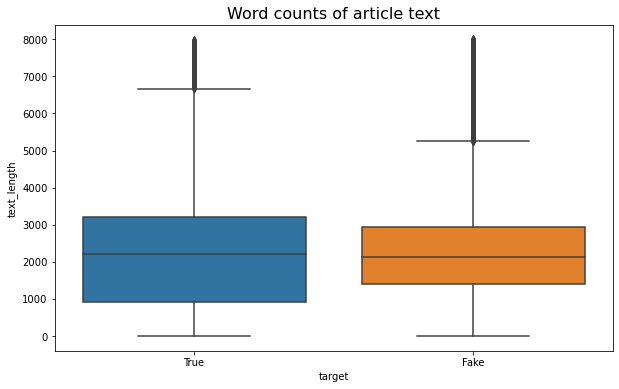

In [17]:
df = data[data['text_length']<8000]
fig = plt.figure(figsize=(10, 6))
plt.title("Word counts of article text", fontsize=16,)
ax = sns.boxplot(x='target', y="text_length", data=df)
plt.show()
del df

In [18]:


def valid_date(date_input):
    if re.match('[A-z]+\s+\d+,\s+\d{4}|\d+-\w+-\d{2}',date_input):
        return True
    else:
        return False
    
temp_data= data.copy() 

temp_data['Valid_Date']= temp_data['date'].apply(lambda x: valid_date(x))
temp_data[temp_data['Valid_Date']== False]



,title,text,subject,date,target,preProcessTitle,preProcessText,title_length,text_length,Valid_Date
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,Fake,httpspercentfedupcomservedroymoorevietnamlette...,httpspercentfedupcomservedroymoorevietnamlette...,145,145,False
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,Fake,httpspercentfedupcomvideohillaryaskedabouttrum...,httpspercentfedupcomvideohillaryaskedabouttrum...,88,88,False
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,Fake,httpspercentfedupcomyroldblackconservativewhos...,httpspercentfedupcomyroldblackconservativewhos...,149,149,False
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,httpsfedupwpenginecomwpcontentuploadshillaryst...,httpsfedupwpenginecomwpcontentuploadshillaryst...,74,74,False
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,httpsfedupwpenginecomwpcontentuploadsentitledjpg,httpsfedupwpenginecomwpcontentuploadsentitledjpg,66,66,False
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,httpsfedupwpenginecomwpcontentuploadshillaryst...,httpsfedupwpenginecomwpcontentuploadshillaryst...,74,74,False
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,httpsfedupwpenginecomwpcontentuploadsentitledjpg,httpsfedupwpenginecomwpcontentuploadsentitledjpg,66,66,False
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,Fake,homepage,vcrowvccolumn width tdblocktrendingnow limit t...,8,578,False
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,httpsfedupwpenginecomwpcontentuploadshillaryst...,httpsfedupwpenginecomwpcontentuploadshillaryst...,74,74,False
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,httpsfedupwpenginecomwpcontentuploadsentitledjpg,httpsfedupwpenginecomwpcontentuploadsentitledjpg,66,66,False


In [19]:
data.drop(list(temp_data[temp_data['Valid_Date']== False].index),axis=0,inplace=True)

In [20]:
data['Date']=pd.to_datetime(data['date'])
data['Month']= data['Date'].apply(lambda x: calendar.month_name[x.month])
data['Year']= data['Date'].dt.year
data.head()

,title,text,subject,date,target,preProcessTitle,preProcessText,title_length,text_length,Date,Month,Year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,budget fight looms republicans flip fiscal script,washington reuters head conservative republica...,64,4659,2017-12-31,December,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,military accept transgender recruits monday pe...,washington reuters transgender people allowed ...,64,4077,2017-12-29,December,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,senior republican senator let mr mueller job,washington reuters special counsel investigati...,60,2789,2017-12-31,December,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,59,2461,2017-12-30,December,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,trump wants postal service charge amazon shipm...,seattlewashington reuters president donald tru...,69,5204,2017-12-29,December,2017


Text(0.5, 1.0, 'Age Distribution')

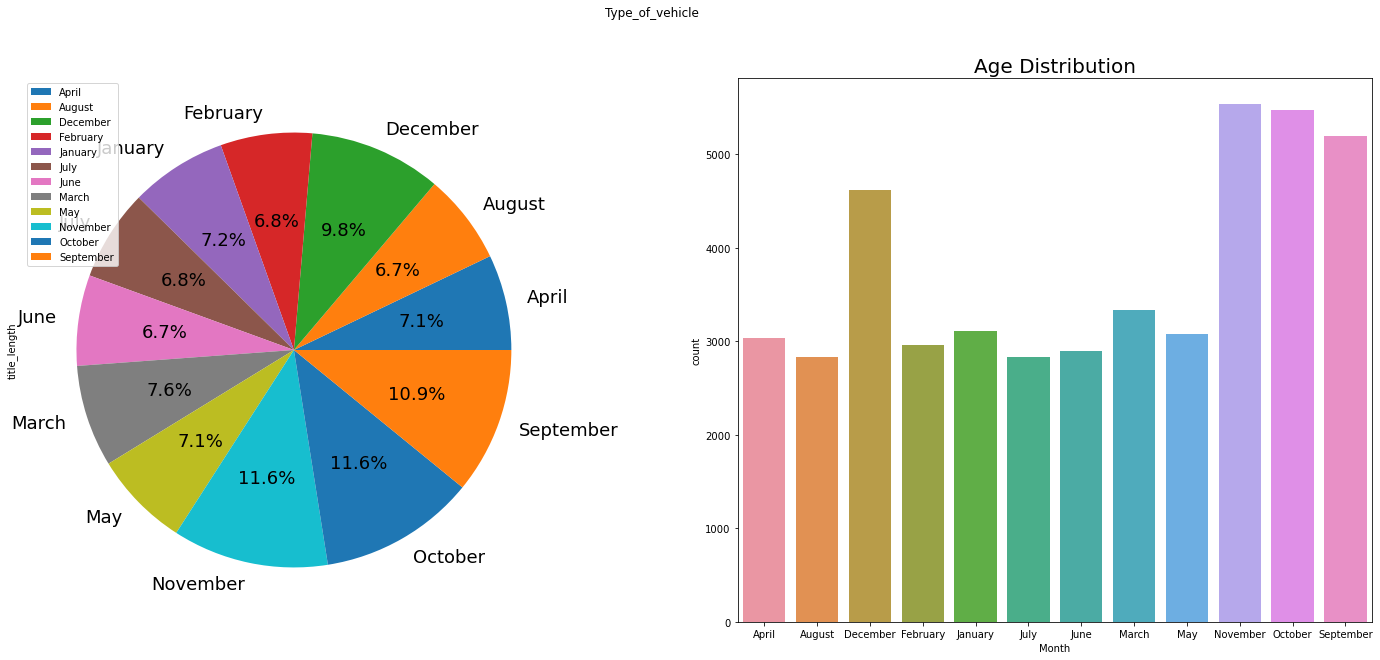

In [21]:
# explode = [0.2,0,0]
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(25,10))
fig1=data[['Month','title_length']].groupby('Month').sum()
fig1.plot(kind='pie',ax= ax1,autopct='%1.1f%%',subplots=True,figsize=(15,9),fontsize=18,title='Type_of_vehicle')
plot = sns.countplot(x ='Month',ax= ax2, data = data.sort_values(by='Month'))
plot.axes.set_title("Age Distribution",fontsize=20)

Text(0.5, 1.0, 'Year Distribution')

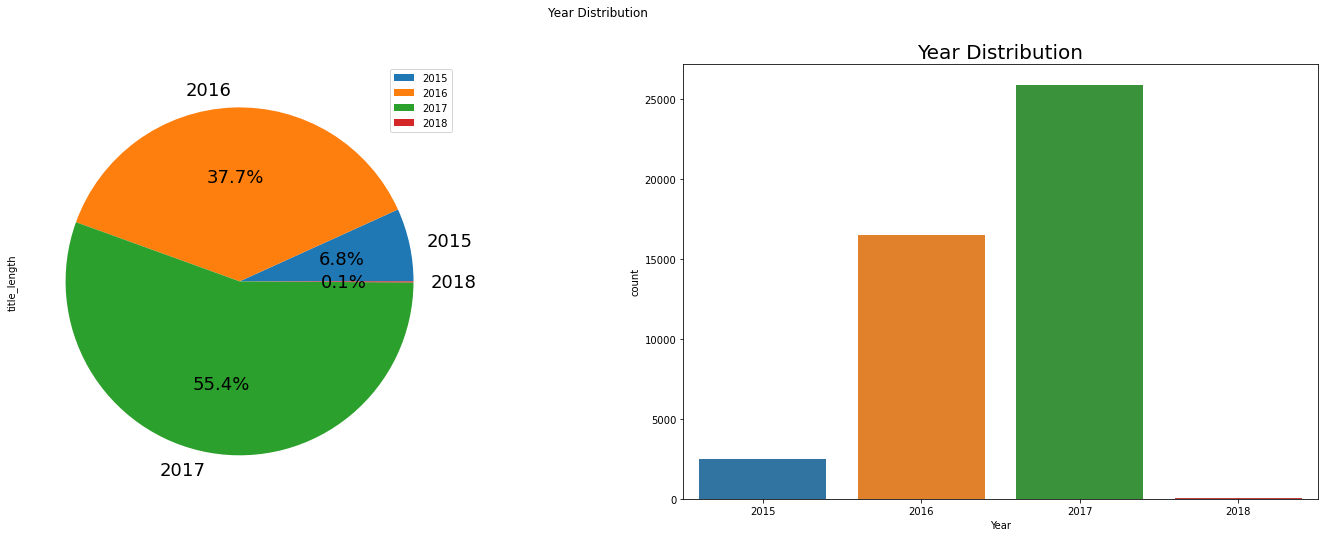

In [22]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(25,8))
fig1=data[['Year','title_length']].groupby('Year').sum()
fig1.plot(kind='pie',ax= ax1,autopct='%1.1f%%',subplots=True,figsize=(15,9),fontsize=18,title='Year Distribution')
plot = sns.countplot(x ='Year',ax= ax2, data = data.sort_values(by='Year'))
plot.axes.set_title("Year Distribution",fontsize=20)

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

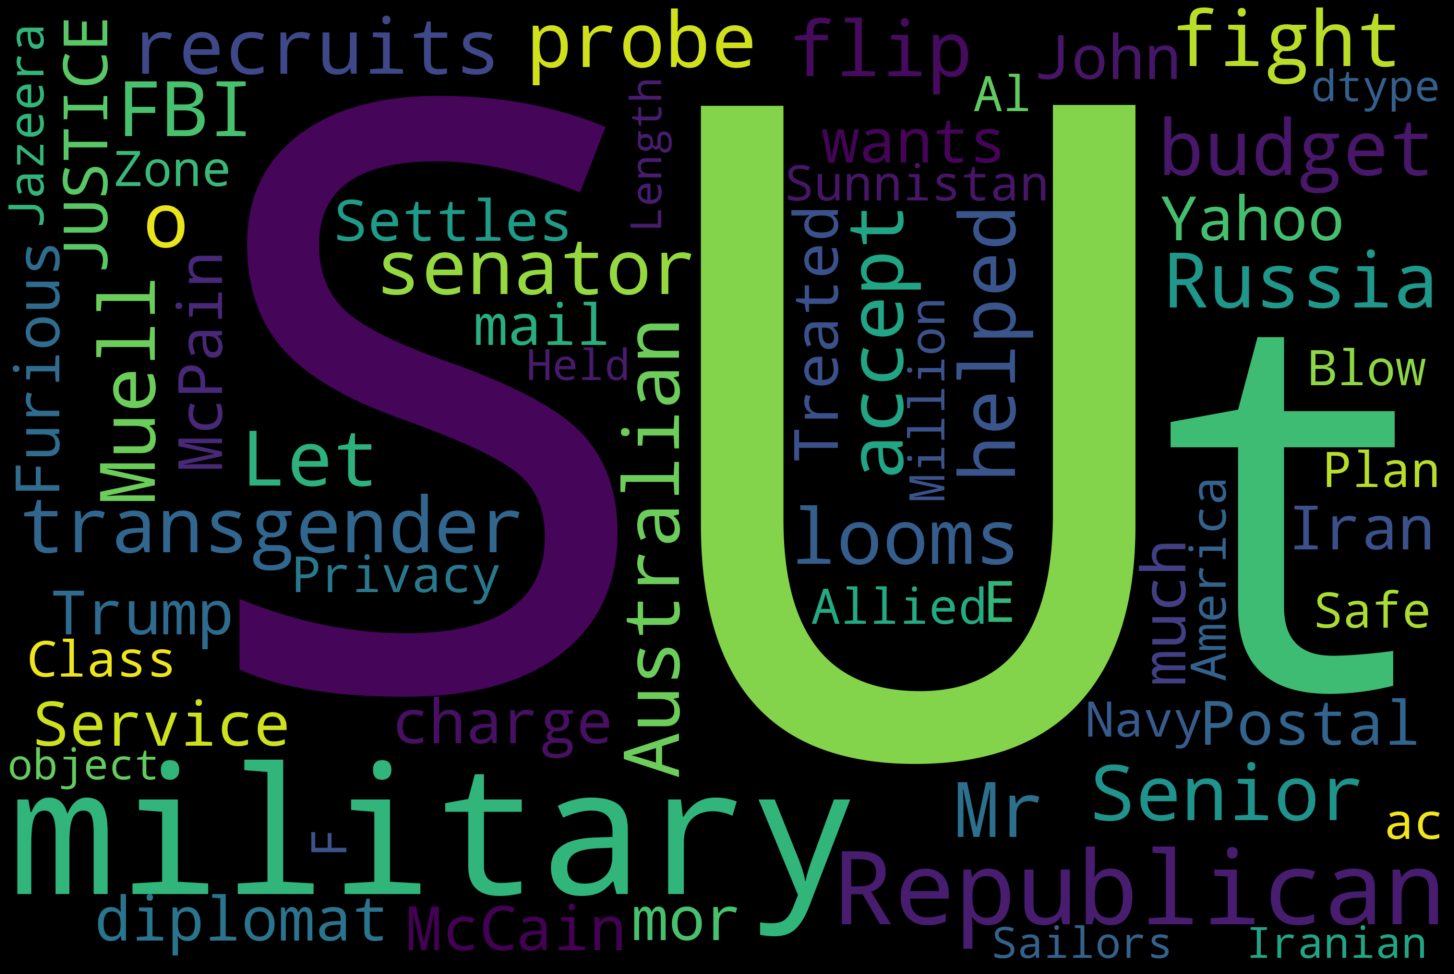

In [24]:
my_data  =title= data.title+ ' '+data.subject+ ' '+data.text

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(my_data))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
stemmer = hazm.Stemmer()
lem = hazm.Lemmatizer()

In [26]:
dataset  = pd.DataFrame(columns=('title',))
for index, row in data.iterrows():
    title_subject_body=row['title'] + ' '+row['subject']+ ' '+row['text']
    title_body_tokenized = hazm.word_tokenize(title_subject_body)
    title_body_tokenized_filtered = [w.lower() for w in title_body_tokenized if not w.lower() in stopwords]
    title_body_tokenized_filtered_stemmed = [stemmer.stem(w) for w in title_body_tokenized_filtered]
    title_body_tokenized_filtered_lem = [lem.lemmatize(w).replace('#', ' ') for w in title_body_tokenized_filtered]
    s = re.sub('[^\w\s]', '', ' '.join(title_body_tokenized_filtered_stemmed))
    s += ' '.join(title_body_tokenized_filtered_lem)
    s = re.sub("\d+", "", s)
    dataset.loc[index] = {
        'title': s,
    }

In [27]:
len(dataset.title)

44888

In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
vectorizer.fit(dataset.title)
X =vectorizer.transform(dataset.title)

In [29]:
le = LabelEncoder()
y= le.fit_transform(data['target'])

In [30]:
np.shape(X)

(44888, 12436540)

In [31]:
np.shape(y)

(44888,)

In [32]:
with open('Xlem.al', 'wb') as f:
    pickle.dump(X, f)

with open('ylem.al', 'wb') as f:
    pickle.dump(y, f)

In [33]:
# with open('X.al', 'rb') as f:
#     X = pickle.load(f)
# with open('y.al', 'rb') as f:
#     y = pickle.load(f)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [35]:
dtc = DecisionTreeClassifier()
knnc = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=5000,
                             max_depth=15,min_samples_split= 4)
xg_reg  =XGBClassifier(max_depth=15,min_child_weight= 1,gamma= 0.5, learning_rate= 0.2,n_jobs=-1)

cbc = CatBoostClassifier(random_state=0)
class_list=[xg_reg,dtc,knnc,rfc]
# class_list=[cbc]

In [36]:
%%time

counter=1
for reg in class_list:
    reg.fit(X_train,y_train)
    print(f"Fitting {counter} done")
    counter+=1

Fitting 1 done
Fitting 2 done
Fitting 3 done
Fitting 4 done
CPU times: user 3h 19min 41s, sys: 7min 23s, total: 3h 27min 4s
Wall time: 36min 17s


In [37]:
%%time
score_dict={}

for reg in class_list:
    
    reg_name = reg.__class__.__name__
    
    pred=reg.predict(X_test)
    
    print("-"*50)
    
    print(reg_name)
  
    print(f"accuracy score : {accuracy_score(y_test,pred)}")
    print(f"classification report : {classification_report(y_test,pred)}")


    score_dict[reg_name]={
        "accuracy score":accuracy_score(y_test,pred),
    }

--------------------------------------------------
XGBClassifier
accuracy score : 0.9999108893245411
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5799
           1       1.00      1.00      1.00      5423

    accuracy                           1.00     11222
   macro avg       1.00      1.00      1.00     11222
weighted avg       1.00      1.00      1.00     11222

--------------------------------------------------
DecisionTreeClassifier
accuracy score : 0.9985742291926573
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5799
           1       1.00      1.00      1.00      5423

    accuracy                           1.00     11222
   macro avg       1.00      1.00      1.00     11222
weighted avg       1.00      1.00      1.00     11222

--------------------------------------------------
KNeighborsClassifier
accuracy score 

In [38]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("accuracy score" ,ascending=False)
score_pd

,accuracy score
XGBClassifier,0.999911
DecisionTreeClassifier,0.998574
RandomForestClassifier,0.949563
KNeighborsClassifier,0.903939
